# Plotting Sigmoid Functions

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook

In [0]:
def sigmoid(x,w,b):
    return 1/(1+np.exp(-(w*x+b)))

In [44]:
sigmoid(1,0.5,0)

0.6224593312018546

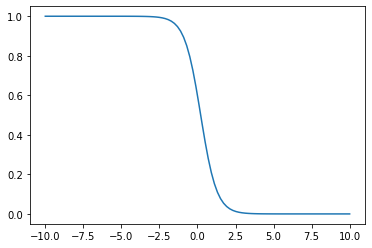

In [45]:
w = -1.9    #@param {type: "slider", min:-2, max:2, step:0.1}
b = 0.4     #@param {type: "slider", min:-2, max:2, step:0.1}
X = np.linspace(-10,10,100)
Y = sigmoid(X,w,b)
plt.plot(X,Y)
plt.show()

In [0]:
def sigmoid_2d(x1, x2, w1, w2, b):
    return 1/(1+np.exp(-(w1*x1 + w2*x2 + b)))

In [0]:
X1 = np.linspace(-10,10,100)
X2 = np.linspace(-10,10,100)

XX1, XX2 = np.meshgrid(X1,X2)

In [0]:
w1 = 0.5
w2 = 0.5
b=0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

Text(0.5, 0, 'Y')

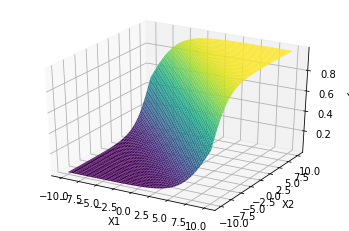

In [49]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

# Plot Loss

In [0]:
w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25)*20-10
Y = sigmoid(X, w_unknown, b_unknown)

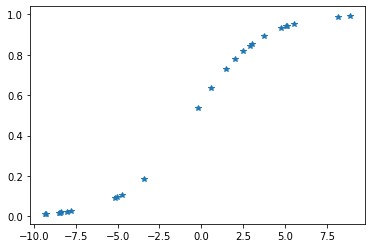

In [51]:
plt.plot(X,Y,'*')
plt.show()

In [0]:
def calculate_loss(X, Y, w_est, b_est):
    loss = 0
    for x,y in zip(X,Y):
        loss += (y-sigmoid(x, w_est, b_est))**2
    return loss

In [0]:
W = np.linspace(0,2,100)
B = np.linspace(-1,1,100)

WW, BB = np.meshgrid(W,B)

Loss = np.zeros(WW.shape)

In [0]:
for i in range(WW.shape[0]):
    for j in range(WW.shape[1]):
        Loss[i,j] = calculate_loss(X, Y, WW[i,j], BB[i,j])

Text(0.5, 0, 'loss')

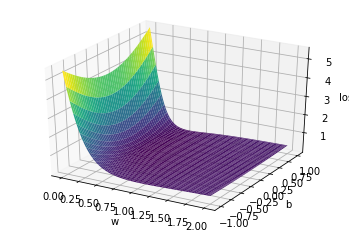

In [55]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('loss')

In [0]:
ij = np.argmin(Loss)
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - i*Loss.shape[1])

In [57]:
print(i,j)

62 25


In [58]:
print(WW[i,j], BB[i,j])

0.5050505050505051 0.2525252525252526


# Class for Sigmoid Neuron

In [0]:
class SigmoidNeuron:
    def __init__(self):
        self.w = None
        self.b = None
    
    def perceptron(self, x):
        return np.dot(x, self.w.T) + b
    
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))
    
    def grad_w(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y)*y_pred*(1-y_pred)*x

    def grad_b(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y)*y_pred*(1-y_pred)

    def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):
        
        if initialise:
            self.w = np.random.randn(1, X.shape[1])
            self.b = 0

        if display_loss:
            loss={}

        for i in tqdm_notebook(range(epochs), total=epochs, unit='epochs'):
            dw = 0
            db = 0
            for x,y in zip(X,Y):
                dw += self.grad_w(x,y)
                db += self.grad_b(x,y)
            self.w -= learning_rate * dw
            self.b -= learning_rate * db

            if display_loss:
                Y_pred = self.sigmoid(self.perceptron(X))
                loss[i] = mean_squared_error(Y_pred, Y)
        
        if display_loss:
            plt.plot(np.asarray(list(loss.values())).astype(np.float))
            plt.xlabel('Epochs')
            plt.ylabel('Mean Squared Error')
            plt.show()

    def predict(self, X):
        Y_pred = []
        for x in X:
            y_pred = self.sigmoid(self.perceptron(x))
            Y_pred.append(y_pred)
        return np.array(Y_pred)

# Fit for SigmoidNeuron()

In [0]:
X = np.asarray([[2.5,2.5], [4,-1], [1,-4], [-3,1.25], [-2,-4], [1,5]])
Y = [1,1,1,0,0,0]

In [0]:
sn = SigmoidNeuron()
sn.fit(X,Y,1,0.25)

In [0]:
def plot_sn(X,Y,sn,ax):
    X1 = np.linspace(-10,10,100)
    X2 = np.linspace(-10,10,100)
    XX1, XX2 = np.meshgrid(X1,X2)
    YY = np.zeros(XX1.shape)
    for i in range(X2.size):
        for j in range(X1.size):
            val = np.asarray([X1[j], X2[i]])
            YY[i,j] = sn.sigmoid(sn.perceptron(val))
    ax.contourf(XX1,XX2,YY,cmap='viridis',alpha=0.6)
    ax.scatter(X[:,0], X[:,1],c=Y, cmap='viridis')
    ax.plot()

[[ 1.32166483 -0.29888402]] [-0.03195476]
[[ 1.3031678  -0.52808865]] [-0.09840551]
[[ 1.39321373 -0.42005896]] [-0.15275476]
[[ 1.41167359 -0.50611204]] [-0.20860216]
[[ 1.46582611 -0.47944695]] [-0.2601885]
[[ 1.49683368 -0.5137513 ]] [-0.3115211]
[[ 1.53703134 -0.51560251]] [-0.36093601]
[[ 1.57044338 -0.53248778]] [-0.40942347]
[[ 1.60493235 -0.54180334]] [-0.45663106]
[[ 1.63716836 -0.5537242 ]] [-0.50277764]
[[ 1.66869247 -0.56403514]] [-0.54783419]
[[ 1.69902462 -0.57443291]] [-0.59186576]
[[ 1.72844552 -0.58433493]] [-0.6349008]
[[ 1.75695059 -0.59397278]] [-0.67697851]
[[ 1.78462045 -0.60330192]] [-0.71813279]
[[ 1.81150087 -0.61236058]] [-0.7583973]
[[ 1.83764062 -0.62116053]] [-0.79780399]
[[ 1.86308175 -0.6297184 ]] [-0.8363835]
[[ 1.88786292 -0.63804777]] [-0.87416513]
[[ 1.91201926 -0.64616134]] [-0.91117689]
[[ 1.93558292 -0.65407059]] [-0.94744553]
[[ 1.9585834  -0.66178608]] [-0.98299664]
[[ 1.98104787 -0.66931747]] [-1.01785466]
[[ 2.00300143 -0.6766737 ]] [-1.0520429

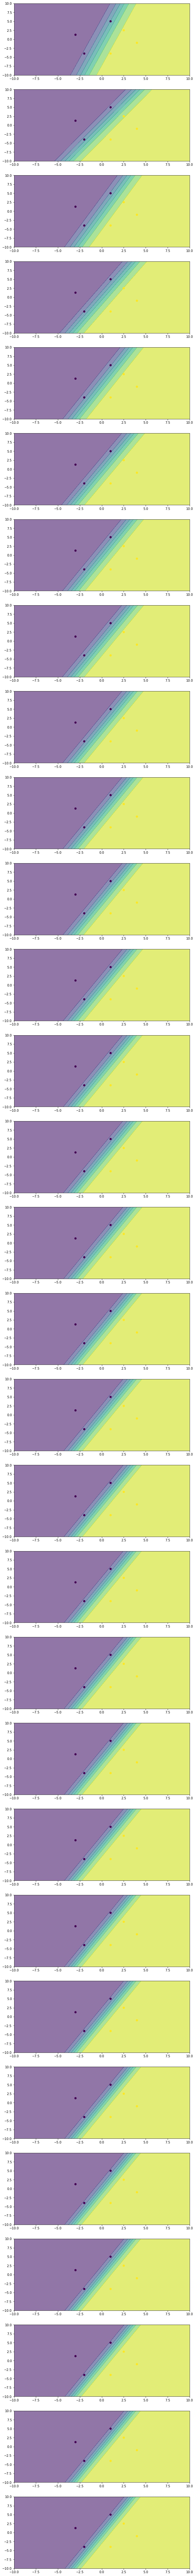

In [63]:
sn.fit(X,Y,1,0.5)
N = 30
plt.figure(figsize=(10, N*5))
for i in range(N):
    print(sn.w, sn.b)
    ax = plt.subplot(N, 1, i+1)
    plot_sn(X,Y,sn,ax)
    sn.fit(X,Y,1,0.5,False)

# Real world data

### Loading Data

In [64]:
!ls

mobile_cleaned-1551253091700.csv  mobile_cleaned.csv  sample_data


In [0]:
df = pd.read_csv('/content/drive/My Drive/mobile_cleaned.csv')

In [91]:
df.head(5)

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,...,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,20,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,25,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,24,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,16,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4


In [92]:
df.shape

(341, 88)

In [0]:
X = df.drop('Rating', axis=1)

In [0]:
Y = df['Rating'].values

In [0]:
threshold = 4.2
df['Class'] = (df['Rating']>=threshold).astype(np.int)

In [96]:
df['Class'].value_counts(normalize=True)

0    0.533724
1    0.466276
Name: Class, dtype: float64

In [0]:
Y_binarised = df['Class'].values

### Data Preprocessing - Standardisation

In [0]:
scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=0,stratify=Y_binarised)

In [100]:
print(X_train.shape, X_test.shape)

(255, 87) (86, 87)


In [0]:
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [0]:
Y_scaled_train = minmax_scaler.fit_transform(Y_train.reshape(-1,1))
Y_scaled_test = minmax_scaler.transform(Y_test.reshape(-1,1))

In [103]:
print(np.min(Y_scaled_train), np.max(Y_scaled_train))

0.0 1.0


In [0]:
scaled_threshold = minmax_scaler.transform(np.asarray([threshold]).reshape(1,-1))[0][0]

In [105]:
print(scaled_threshold)

0.6800000000000002


In [106]:
Y_binarised_train = (Y_scaled_train > scaled_threshold).astype(np.int).ravel()
Y_binarised_test = (Y_scaled_test > scaled_threshold).astype(np.int).ravel()
print(Y_binarised_train)

[0 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0
 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0
 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 1 0 1
 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1]


### Fitting Data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


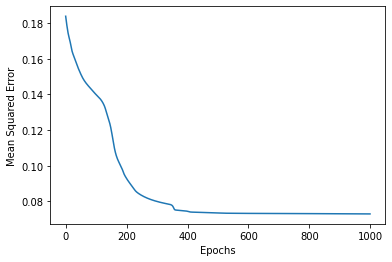

In [107]:
sn = SigmoidNeuron()
sn.fit(X_scaled_train, Y_scaled_train, 1000, 0.02, display_loss=True)

In [0]:
Y_pred_train = sn.predict(X_scaled_train)
Y_pred_test = sn.predict(X_scaled_test)

In [0]:
Y_pred_binarised_train = (Y_pred_train > scaled_threshold).astype(np.int).ravel()
Y_pred_binarised_test = (Y_pred_test > scaled_threshold).astype(np.int).ravel()

In [110]:
print(accuracy_score(Y_pred_binarised_train, Y_binarised_train))
print(accuracy_score(Y_pred_binarised_test, Y_binarised_test))

0.796078431372549
0.8255813953488372
